## ANN using classes instead of sequential


In [1]:
# Imports
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

# Pytorch Gpu Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

import matplotlib.pyplot as plt

# Matplotlib svg plots for better pictures
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

import seaborn as sns
import pandas as pd
from torchsummary import summary

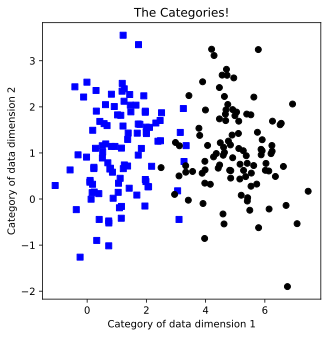

In [2]:
# Create the data
nPerCluster = 100
blur = 1  # Std Deviation of 1

A = [1, 1]
B = [5, 1]

# Generate the data
a = [
    A[0] + np.random.randn(nPerCluster) * blur,
    A[1] + np.random.randn(nPerCluster) * blur,
]
b = [
    B[0] + np.random.randn(nPerCluster) * blur,
    B[1] + np.random.randn(nPerCluster) * blur,
]

# True labels
labels_np = np.vstack((np.zeros((nPerCluster, 1)), np.ones((nPerCluster, 1))))

# Stack it into a matrix
data_np = np.hstack((a, b)).T

# Convert np matrix into a tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Plot the data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[np.where(labels.cpu() == 0)[0], 0].cpu(),
    data[np.where(labels.cpu() == 0)[0], 1].cpu(),
    "bs",
)
plt.plot(
    data[np.where(labels.cpu() == 1)[0], 0].cpu(),
    data[np.where(labels.cpu() == 1)[0], 1].cpu(),
    "ko",
)
plt.title("The Categories!")
plt.xlabel("Category of data dimension 1")
plt.ylabel("Category of data dimension 2")
plt.show()

In [3]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(" ")

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


### Build this model using classes

ANNclassify = nn.Sequential(<br>
&emsp;nn.Linear(2,1), # input layer<br>
&emsp;nn.ReLU(), # activation unit <br>
&emsp;nn.Linear(1,1), # output unit <br>
&emsp;nn.Sigmoid(), # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)<br>
)


In [ ]:
# Define the class
class ANNClass(nn.Module):
    def __init__(self):
        super().__init__()

        ##Input Layer
        self.input = nn.Linear(2, 1)

        # Output Layer
        self.output = nn.Linear(1, 1)

    # Forward pass
    def forward(self, x):

        # Pass through input layer
        x = self.input(x)

        # Apply ReLU
        x = F.relu(x)

        # Output Layer
        x = self.output(x)
        x = torch.sigmoid(x)

        return x


# Create class instance

ANNClassModel = ANNClass()

In [5]:
lr = 0.01

# Loss Function
lossFun = nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(ANNClassModel.parameters(), lr=lr)

In [6]:
# Train the model
n_epoches = 5000
losses = torch.zeros(n_epoches)

for epoch in range(n_epoches):
    # Forward pass
    yHat = ANNClassModel(data)

    # Compute the loss
    loss = lossFun(yHat, labels)
    losses[epoch] = loss

    # Back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

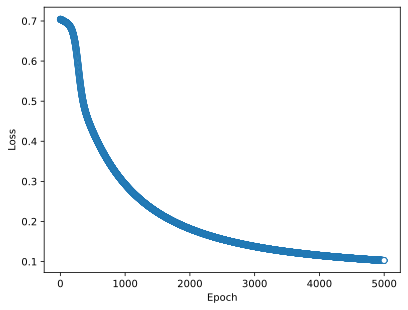

In [7]:
# show the losses

plt.plot(losses.cpu().detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [8]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNClassModel(data)

predlabels = predictions > 0.5

# find errors
misclassified = np.where(predlabels.cpu() != labels.cpu())[0]

# total accuracy
totalacc = 100 - 100 * len(misclassified) / (2 * nPerCluster)

print("Final accuracy: %g%%" % totalacc)

Final accuracy: 96.5%


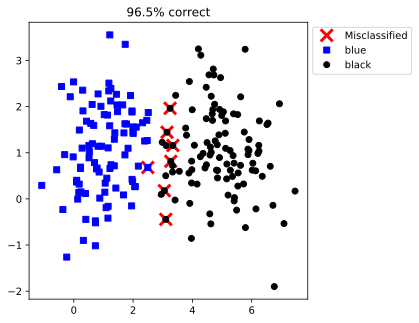

In [ ]:
# plot the labeled data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[misclassified, 0].cpu(),
    data[misclassified, 1].cpu(),
    "rx",
    markersize=12,
    markeredgewidth=3,
)
plt.plot(
    data[np.where(~predlabels.cpu())[0], 0].cpu(),
    data[np.where(~predlabels.cpu())[0], 1].cpu(),
    "bs",
)
plt.plot(
    data[np.where(predlabels.cpu())[0], 0].cpu(),
    data[np.where(predlabels.cpu())[0], 1].cpu(),
    "ko",
)

plt.legend(["Misclassified", "blue", "black"], bbox_to_anchor=(1, 1))
plt.title(f"{totalacc}% correct")
plt.show()